In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT 

%matplotlib inline

Welcome to JupyROOT 6.24/02


In [2]:
#Example for reading a tree from a single root-file
#inFile = ROOT.TFile.Open("1/GammaCaloMergedML_1540.root", "READ")
#tree = inFile.Get("00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Pio")

#Reading out a RDataFrame, works well for everything Int and float
#df = ROOT.RDataFrame("00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Pio", "1/GammaCaloMergedML_1540.root")
#ClusterType = df.AsNumpy(columns=["Cluster"])
#print(ClusterType)

In [3]:
#Creates a list filled with a TChain for every tree that should be read out
#The location of all root-files is needed as input, written in a file one path per line
#Takes a list of the names of all trees
#line[2:] to remove unnecessary characters and strip to remove all whitespaces from path to files
def create_chains(filelist, tree_name):
    f = open(filelist, "r")
    chainlist = []
    for name in tree_name:        
        chainlist.append(ROOT.TChain(name))
        
    
    print("Path to all root-files:")    
    for line in f:
        path = line.strip()
        print("{}".format(path))
        for i in range(len(tree_name)):
            chainlist[i].Add("{}".format(path))
            
    for i in range(len(tree_name)):
        print("Number of clusters in {}: {}".format(tree_name[i], chainlist[i].GetEntries()))
    f.close()
    return chainlist

In [5]:
#List with names of the trees
Tree_Name = ["00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Pio"
            ,"00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Eta"
            ,"00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Bck"]

Chain_pi0 = create_chains("MergedMLPath_pi0.txt", Tree_Name)

Path to all root-files:
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/3/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/11/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/2/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/5/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/17/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/14/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/9/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/12/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/4/255591/GammaCaloMergedML_1540.root


In [6]:
Chain_eta_bck = create_chains("MergedMLPath_etabck.txt", Tree_Name)

Path to all root-files:
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/3/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/11/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/2/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/5/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/17/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/14/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/9/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/12/255591/GammaCaloMergedML_1540.root
/media/DATA/ALICE_Train_Output/LegoTrain_3769_20210622-1126/LHC19a1a_2/4/255591/GammaCaloMergedML_1540.root


In [7]:
Chain_pi0[0].Show(0)

======> EVENT:0
 Cluster         = 0, 
                  0, 0, 0, 0, 0, 
                  0, 0, 0, 0, 0, 
                  0, 0, 0, 0, 0, 
                  0, 0, 0, 0
 ClusterType     = 2
 ClusterE        = 6.89155
 ClusterPt       = 6.62927
 ClusterModuleNumber = 16
 ClusterX        = 26
 ClusterY        = 7
 PartIsPrimary   = 1
 PartPID         = 111
 PartPt          = 6.3611
 PartE           = 6.61276
 PartEta         = 0.280371
 PartPhi         = 5.3519
 ClusterM02      = 0.162697
 PartM20         = 0.0995582


In [8]:
def readout_chain(chain, part):
    nentries = chain.GetEntries()
    #arrays for the information
    Cluster = np.zeros((nentries,50,50), dtype=np.float32)
    ClusterType = np.zeros((nentries), dtype=np.ubyte)
    ClusterE = np.zeros((nentries), dtype=np.float32)
    ClusterPt = np.zeros((nentries), dtype=np.float32)
    ClusterModuleNumber = np.zeros((nentries), dtype=np.ubyte)
    ClusterX = np.zeros((nentries), dtype=np.ubyte)
    ClusterY = np.zeros((nentries), dtype=np.ubyte)
    ClusterM20 = np.zeros((nentries), dtype=np.float32)
    ClusterM02 = np.zeros((nentries), dtype= np.float32)
    PartE = np.zeros((nentries), dtype=np.float32)
    PartPt = np.zeros((nentries), dtype=np.float32)
    PartEta = np.zeros((nentries), dtype=np.float32)
    PartPhi = np.zeros((nentries), dtype=np.float32)
    PartIsPrimary = np.zeros((nentries), dtype=bool)
    PartPID = np.zeros((nentries), dtype=np.short)
    
    #Temp Variables to hold the values from each entry
    _Cluster = np.zeros((50,50), dtype=np.float32)
    _ClusterType = np.zeros((1), dtype=np.ubyte)
    _ClusterE = np.zeros((1), dtype=np.float32)
    _ClusterPt = np.zeros((1), dtype=np.float32)
    _ClusterModuleNumber = np.zeros((1), dtype=np.ubyte)
    _ClusterX = np.zeros((1), dtype=np.ubyte)
    _ClusterY = np.zeros((1), dtype=np.ubyte)
    _ClusterM20 = np.zeros((1), dtype=np.float32)
    _ClusterM02 = np.zeros((1), dtype= np.float32)
    _PartE = np.zeros((1), dtype=np.float32)
    _PartPt = np.zeros((1), dtype=np.float32)
    _PartEta = np.zeros((1), dtype=np.float32)
    _PartPhi = np.zeros((1), dtype=np.float32)
    _PartIsPrimary = np.zeros((1), dtype=bool)
    _PartPID = np.zeros((1), dtype=np.short)
   
    #Set up all the branchaddresses accordingly
    chain.SetBranchAddress("Cluster", _Cluster)
    chain.SetBranchAddress("ClusterType", _ClusterType)
    chain.SetBranchAddress("ClusterE", _ClusterE)
    chain.SetBranchAddress("ClusterPt", _ClusterPt)
    chain.SetBranchAddress("ClusterModuleNumber", _ClusterModuleNumber)
    chain.SetBranchAddress("ClusterX", _ClusterX)
    chain.SetBranchAddress("ClusterY", _ClusterY)
    chain.SetBranchAddress("ClusterM20", _ClusterM20)
    chain.SetBranchAddress("ClusterM02", _ClusterM02)
    chain.SetBranchAddress("PartE", _PartE)
    chain.SetBranchAddress("PartPt", _PartPt)
    chain.SetBranchAddress("PartEta", _PartEta)
    chain.SetBranchAddress("PartPhi", _PartPhi)
    if(part == "pi0"):
        chain.SetBranchAddress("PartIsPrimary", _PartIsPrimary)
    elif(part == "eta"):
        chain.SetBranchAddress("IsPrimary", _PartIsPrimary)
    chain.SetBranchAddress("PartPID", _PartPID)
    
    #loop over all entries
    for i in range(0, nentries ):
        chain.GetEntry(i)        
        Cluster[i,:,:] = _Cluster
        ClusterType[i] = _ClusterType
        ClusterE[i] = _ClusterE
        ClusterPt[i] = _ClusterPt
        ClusterModuleNumber[i] = _ClusterModuleNumber
        ClusterX[i] = _ClusterX
        ClusterY[i] = _ClusterY
        ClusterM20[i] = _ClusterM20
        ClusterM02[i] = _ClusterM02
        PartE[i] = _PartE
        PartPt[i] = _PartPt
        PartEta[i] = _PartEta
        PartPhi[i] = _PartPhi
        PartIsPrimary[i] = _PartIsPrimary
        PartPID[i] = _PartPID

    
    if(part == "bck"):
        dict_cluster = {  "Cluster" : Cluster, "ClusterType" : ClusterType, "ClusterE" : ClusterE
                        , "ClusterPt" : ClusterPt, "ClusterModuleNumber" : ClusterModuleNumber
                        , "ClusterX" : ClusterX, "ClusterY" : ClusterY, "ClusterM20" : ClusterM20
                        , "ClusterM02" : ClusterM02, "PartE" : PartE, "PartPt" : PartPt, "PartEta" : PartEta
                        , "PartPhi" : PartPhi, "PartPID" : PartPID}
    else:
        dict_cluster = {  "Cluster" : Cluster, "ClusterType" : ClusterType, "ClusterE" : ClusterE
                        , "ClusterPt" : ClusterPt, "ClusterModuleNumber" : ClusterModuleNumber
                        , "ClusterX" : ClusterX, "ClusterY" : ClusterY, "ClusterM20" : ClusterM20
                        , "ClusterM02" : ClusterM02, "PartE" : PartE, "PartPt" : PartPt, "PartEta" : PartEta
                        , "PartPhi" : PartPhi, "PartIsPrimary" : PartIsPrimary, "PartPID" : PartPID}
    
    return dict_cluster

In [9]:
#Read out all information from the trees and store it in a dict
pi0 = readout_chain(Chain_pi0[0], "pi0")
eta = readout_chain(Chain_eta_bck[1], "eta")
bck = readout_chain(Chain_eta_bck[2], "bck")

In [10]:
pi0["ClusterE"]

array([ 6.891554 ,  8.589667 ,  6.7980905, ...,  6.4569907, 12.384472 ,
        6.391428 ], dtype=float32)

In [11]:
def print_stats(dict_list):
    for i, dic in enumerate(dict_list):
        print("============={}=============".format(names[i]))
        print("Number of merged clusters: {}".format(len(dic["ClusterType"])))
        print()
        
        print("----------Clusters-----------")        
        print("Average Size of Clusters: {0:5.2f} \u00B1 {1:5.2f}".format(np.average( np.sum(dic["Cluster"] != 0, axis=(1,2))) ,np.std( np.sum(dic["Cluster"] != 0, axis=(1,2)))) )
        print("Min Size of Clusters: {0:2d}   Max. Size of Clusters: {1:2d}".format(np.min( np.sum(dic["Cluster"] != 0, axis=(1,2))) ,np.max( np.sum(dic["Cluster"] != 0, axis=(1,2)))) )
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Cluster Energy", np.average(dic["ClusterE"]), np.std(dic["ClusterE"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Cluster Energy", np.min(dic["ClusterE"]), np.max(dic["ClusterE"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Cluster Pt", np.average(dic["ClusterPt"]), np.std(dic["ClusterPt"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Cluster Pt", np.min(dic["ClusterPt"]), np.max(dic["ClusterPt"])))
        print()
        
        print("----------Particles----------")
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Particle Energy", np.average(dic["PartE"]), np.std(dic["PartE"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Particle Energy", np.min(dic["PartE"]), np.max(dic["PartE"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f} GeV".format("Particle Pt", np.average(dic["PartPt"]), np.std(dic["PartPt"])))
        print("Min. {0}: {1:5.2f} GeV   Max. {0}: {2:5.2f} GeV".format("Particle Pt", np.min(dic["PartPt"]), np.max(dic["PartPt"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f}".format("Particle Eta", np.average(dic["PartEta"]), np.std(dic["PartEta"])))
        print("Min. {0}: {1:5.2f}    Max. {0}: {2:5.2f}".format("Particle Eta", np.min(dic["PartEta"]), np.max(dic["PartEta"])))
        print("Average {0}: {1:5.2f} \u00B1 {2:5.2f}".format("Particle Phi", np.average(dic["PartPhi"]), np.std(dic["PartPhi"])))
        print("Min. {0}: {1:5.2f}    Max. {0}: {2:5.2f}".format("Particle Phi", np.min(dic["PartPhi"]), np.max(dic["PartPhi"])))
        print()
        print()

In [12]:
labels = [r"$\pi_0$", r"$\eta$","Bck"]
dicts = [pi0, eta, bck]
names = ['\u03C0'+'0', '\u03B7', 'Bck']

In [13]:
print_stats(dicts)

=============π0=============
Number of merged clusters: 808972

----------Clusters-----------
Average Size of Clusters:  7.86 ±  4.31
Min Size of Clusters:  2   Max. Size of Clusters: 46
Average Cluster Energy: 15.32 ± 13.83 GeV
Min. Cluster Energy:  6.25 GeV   Max. Cluster Energy: 277.93 GeV
Average Cluster Pt: 14.34 ± 12.94 GeV
Min. Cluster Pt:  5.27 GeV   Max. Cluster Pt: 259.84 GeV

----------Particles----------
Average Particle Energy: 14.81 ± 13.49 GeV
Min. Particle Energy:  6.00 GeV   Max. Particle Energy: 263.70 GeV
Average Particle Pt: 13.86 ± 12.63 GeV
Min. Particle Pt:  5.06 GeV   Max. Particle Pt: 246.91 GeV
Average Particle Eta:  0.00 ±  0.37
Min. Particle Eta: -0.61    Max. Particle Eta:  0.61
Average Particle Phi:  2.94 ±  1.25
Min. Particle Phi:  1.41    Max. Particle Phi:  5.56


=============η=============
Number of merged clusters: 489026

----------Clusters-----------
Average Size of Clusters:  7.48 ±  4.43
Min Size of Clusters:  2   Max. Size of Clusters: 53
Averag

In [14]:
def plot_energy(dict_list, labels):
    plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    for i, dic in enumerate(dict_list):
        ax.hist(dic["ClusterE"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Merged Cluster Energy in 13TeV pp-Collisions")
    ax.set_xlabel("Energy [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/clusterenergy.pdf", dpi=300, bbox_inches='tight')
    
def plot_energy_cltype(dict_list, labels):
    plt.rcParams['figure.figsize'] = [48/2.54, 16/2.54]
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["ClusterE"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("Energy [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(100,3000,"ClusterType {}".format(i+1))
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle(" Merged Cluster Energy in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/clusterenergy_type.pdf", dpi=300, bbox_inches='tight')

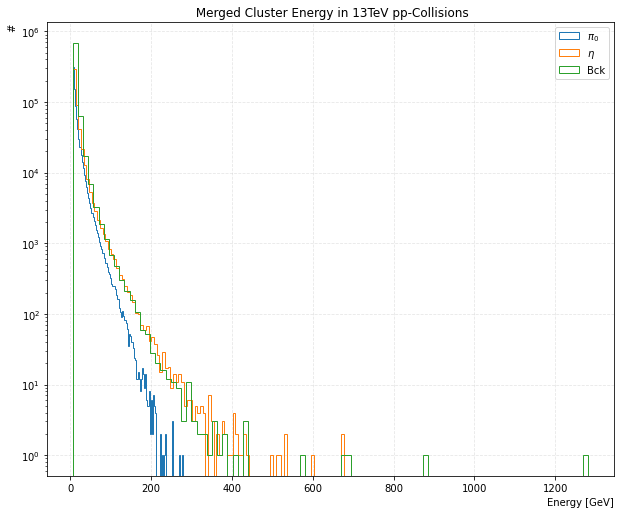

In [15]:
plot_energy(dicts, labels)

π0 ClusterType 1: 260129.0
η ClusterType 1: 35903.0
π0 ClusterType 2: 393554.0
η ClusterType 2: 332362.0
π0 ClusterType 3: 155289.0
η ClusterType 3: 120761.0


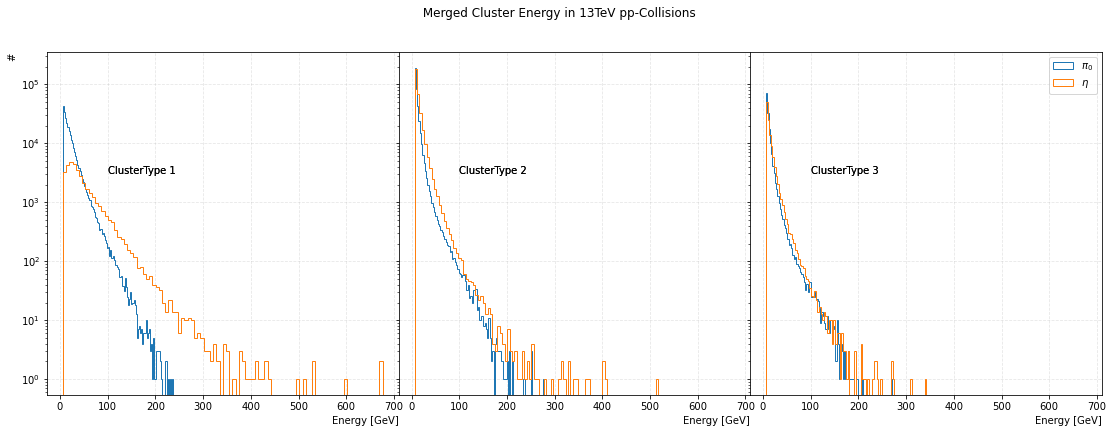

In [16]:
plot_energy_cltype(dicts[0:2], labels[0:2])

In [17]:
def plot_pt(dict_list, labels):
    plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    for i, dic in enumerate(dict_list):
        ax.hist(dic["ClusterPt"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Merged Cluster Pt in 13TeV pp-Collisions")
    ax.set_xlabel("pt [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/clusterpt.pdf", dpi=300, bbox_inches='tight')
    
def plot_pt_cltype(dict_list, labels):
    plt.rcParams['figure.figsize'] = [48/2.54, 16/2.54]
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["ClusterPt"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("pt [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(100,3000,"ClusterType {}".format(i+1))
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle(" Merged Cluster Pt in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/clusterpt_type.pdf", dpi=300, bbox_inches='tight')

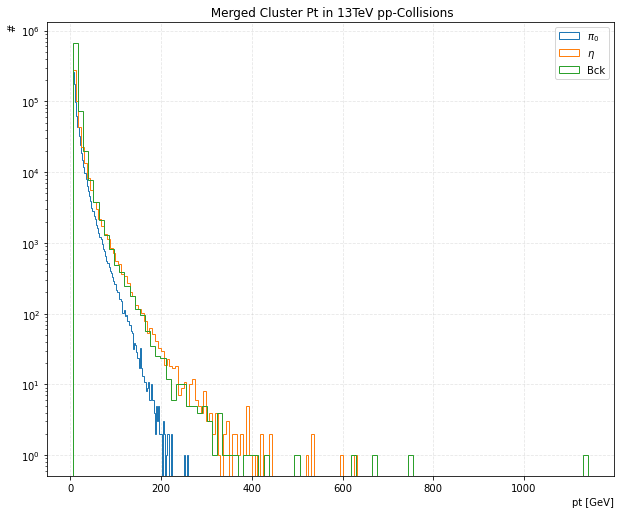

In [18]:
plot_pt(dicts, labels)

π0 ClusterType 1: 260129.0
η ClusterType 1: 35903.0
π0 ClusterType 2: 393554.0
η ClusterType 2: 332362.0
π0 ClusterType 3: 155289.0
η ClusterType 3: 120761.0


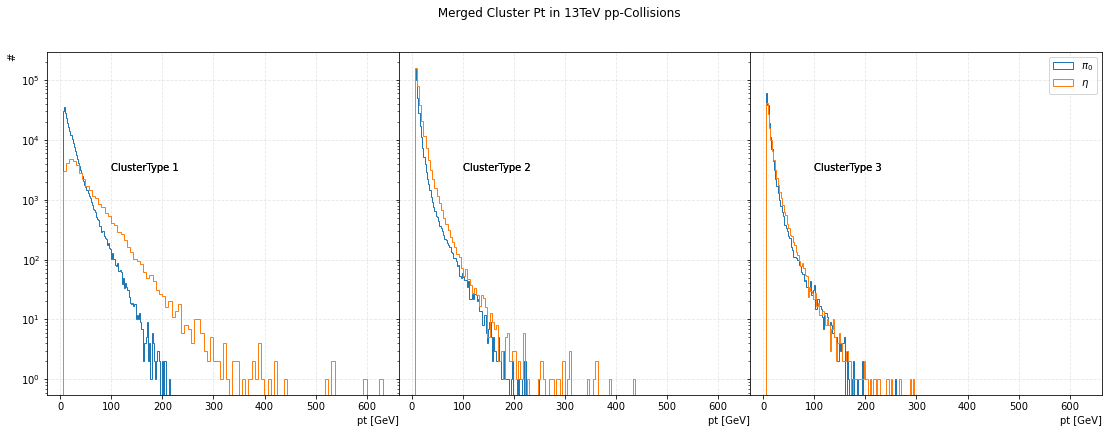

In [19]:
plot_pt_cltype(dicts[0:2], labels[0:2])

In [20]:
def plot_part_e(dict_list, labels):
    plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    for i, dic in enumerate(dict_list):
        ax.hist(dic["PartE"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Particle energie in 13TeV pp-Collisions")
    ax.set_xlabel("Energy [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/parte.pdf", dpi=300, bbox_inches='tight')
    
def plot_part_e_cltype(dict_list, labels):
    plt.rcParams['figure.figsize'] = [48/2.54, 16/2.54]
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["PartE"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("Energy [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(100,3000,"ClusterType {}".format(i+1))
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle("Particle energy in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/parte_type.pdf", dpi=300, bbox_inches='tight')

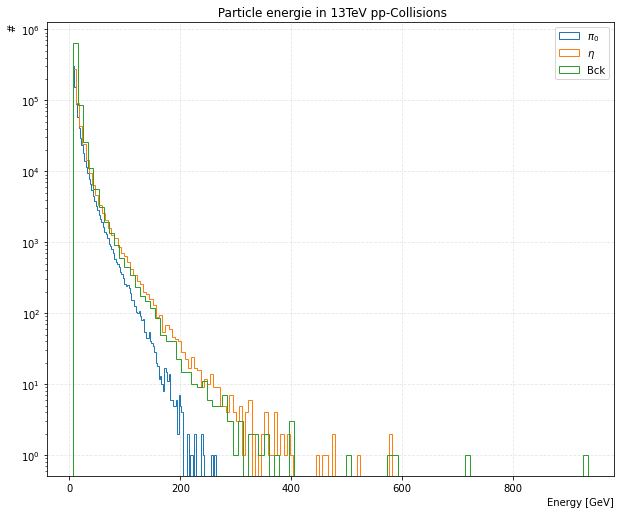

In [21]:
plot_part_e(dicts, labels)

π0 ClusterType 1: 260129.0
η ClusterType 1: 35903.0
π0 ClusterType 2: 393554.0
η ClusterType 2: 332362.0
π0 ClusterType 3: 155289.0
η ClusterType 3: 120761.0


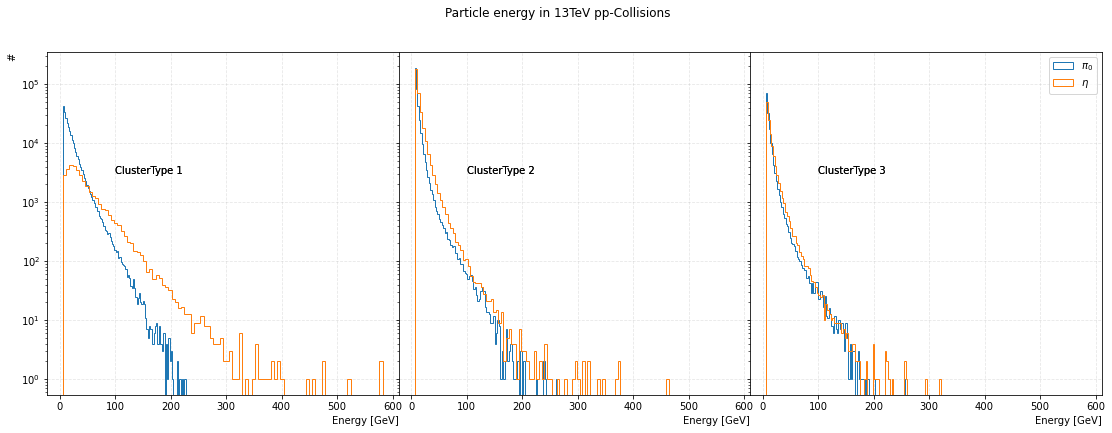

In [22]:
plot_part_e_cltype(dicts[0:2], labels[0:2])

In [23]:
def plot_part_pt(dict_list, labels):
    plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    for i, dic in enumerate(dict_list):
        ax.hist(dic["PartPt"], bins=100, histtype='step', log=True, label=labels[i])
    ax.set_title(" Particle pt in 13TeV pp-Collisions")
    ax.set_xlabel("pt [GeV]", loc='right')
    ax.set_ylabel("#", loc='top')
    plt.legend()
    plt.grid(b=True, linestyle='--', alpha=0.3)
    plt.savefig("Plots/partpt.pdf", dpi=300, bbox_inches='tight')
    
def plot_part_pt_cltype(dict_list, labels):
    plt.rcParams['figure.figsize'] = [48/2.54, 16/2.54]
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    for i in range(3):
        ax = axs[i]
        for j, dic in enumerate(dict_list):
            n, bins,_ = ax.hist(dic["PartPt"][dic["ClusterType"] == i+1], bins=100, histtype='step', log=True, label=labels[j])
            ax.set_xlabel("pt [GeV]", loc='right')
            if(i == 0):
                ax.set_ylabel("#", loc='top')
            ax.grid(b=True, linestyle='--', alpha=0.3)
            ax.text(100,3000,"ClusterType {}".format(i+1))
            print("{} ClusterType {}: {}".format(names[j], i+1, np.sum(n)))
            
    plt.suptitle("Particle pt in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/partpt_type.pdf", dpi=300, bbox_inches='tight')

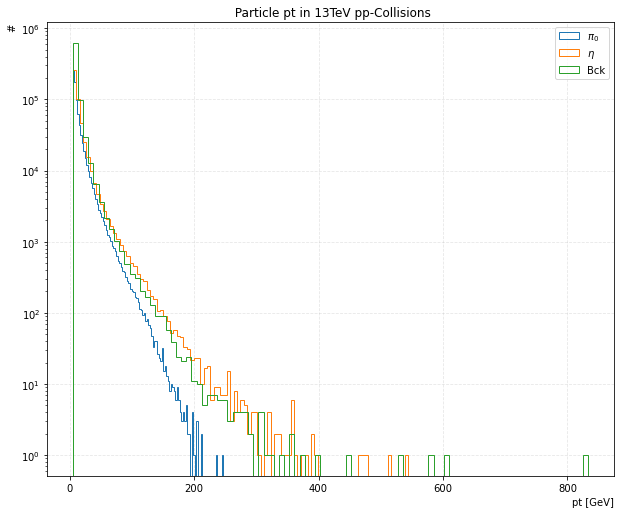

In [24]:
plot_part_pt(dicts, labels)

π0 ClusterType 1: 260129.0
η ClusterType 1: 35903.0
π0 ClusterType 2: 393554.0
η ClusterType 2: 332362.0
π0 ClusterType 3: 155289.0
η ClusterType 3: 120761.0


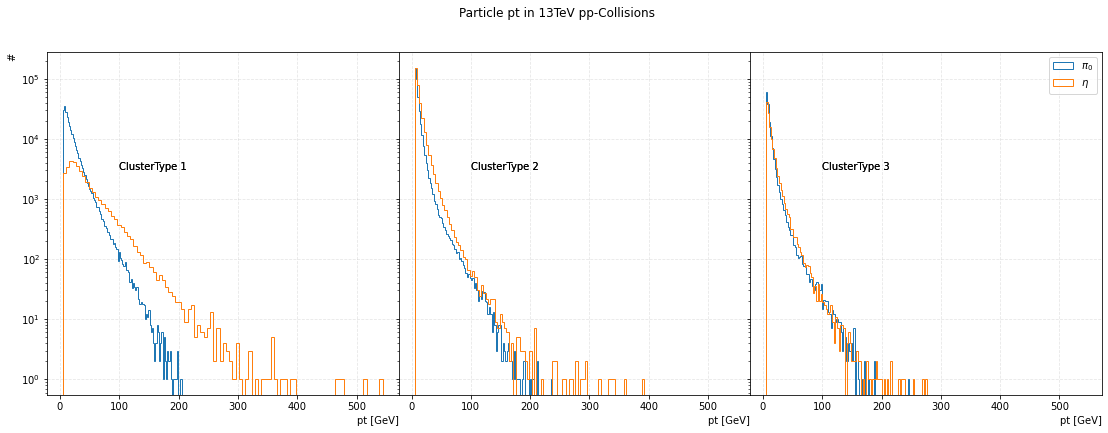

In [25]:
plot_part_pt_cltype(dicts[0:2], labels[0:2])

In [26]:
def plot_comp_e(dict_list, labels):
    plt.rcParams['figure.figsize'] = [48/2.54, 16/2.54]
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
    for i in range(3):
        ax = axs[i]
        dic = dict_list[i]
        ax.hist(dic["ClusterE"], bins=100, histtype='step', log=True, label=labels[i])
        ax.hist(dic["PartE"], bins=100, histtype='step', log=True, label=labels[i])
        ax.set_xlabel("pt [GeV]", loc='right')
        if(i == 0):
            ax.set_ylabel("#", loc='top')
        ax.grid(b=True, linestyle='--', alpha=0.3)
        ax.text(100,3000,"{}".format(labels[i]))
        
            
    plt.suptitle("Particle pt in 13TeV pp-Collisions")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.legend()
    
    plt.savefig("Plots/comp_e.pdf", dpi=300, bbox_inches='tight')

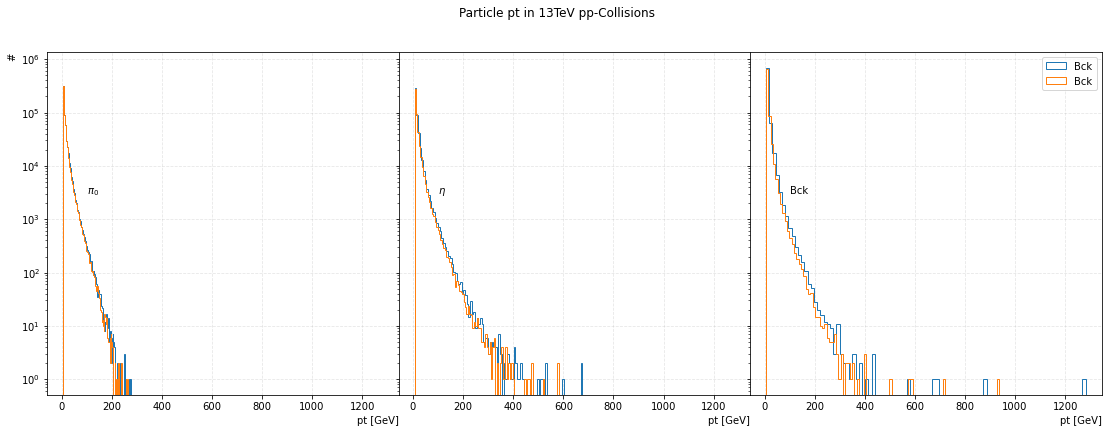

In [27]:
plot_comp_e(dicts, labels)

In [28]:
np.savez_compressed('../CNN/Data/pi0', Cluster=pi0["Cluster"], ClusterType=pi0["ClusterType"], ClusterE=pi0["ClusterE"]
                   ,ClusterPt=pi0["ClusterPt"], ClusterModuleNumber=pi0["ClusterModuleNumber"]
                   ,ClusterX=pi0["ClusterX"], ClusterY=pi0["ClusterY"], ClusterM20=pi0["ClusterM20"]
                   ,ClusterM02=pi0["ClusterM02"], PartE=pi0["PartE"], PartPt=pi0["PartPt"], PartEta=pi0["PartEta"]
                  ,PartPhi=pi0["PartPhi"], PartIsPrimary=pi0["PartIsPrimary"], PartPID=pi0["PartPID"])

np.savez_compressed('../CNN/Data/eta', Cluster=eta["Cluster"], ClusterType=eta["ClusterType"], ClusterE=eta["ClusterE"]
                   ,ClusterPt=eta["ClusterPt"], ClusterModuleNumber=eta["ClusterModuleNumber"]
                   ,ClusterX=eta["ClusterX"], ClusterY=eta["ClusterY"], ClusterM20=eta["ClusterM20"]
                   ,ClusterM02=eta["ClusterM02"], PartE=eta["PartE"], PartPt=eta["PartPt"], PartEta=eta["PartEta"]
                   ,PartPhi=eta["PartPhi"], PartIsPrimary=eta["PartIsPrimary"], PartPID=eta["PartPID"])

np.savez_compressed('../CNN/Data/bck', Cluster=bck["Cluster"], ClusterType=bck["ClusterType"], ClusterE=bck["ClusterE"]
                   ,ClusterPt=bck["ClusterPt"], ClusterModuleNumber=bck["ClusterModuleNumber"]
                   ,ClusterX=bck["ClusterX"], ClusterY=bck["ClusterY"], ClusterM20=bck["ClusterM20"]
                   ,ClusterM02=bck["ClusterM02"], PartE=bck["PartE"], PartPt=bck["PartPt"], PartEta=bck["PartEta"]
                   ,PartPhi=bck["PartPhi"], PartPID=bck["PartPID"])